# Basketball med luftmotstand

I denne demonstrasjonen skal vi simulere kast av en basketball fra en høy klippe (eller demning), der vi sammenlikner det naive tilfellet (fritt fall) med fall med luftmotstand for høye hastigheter:
$$ \mathbf F_D = -\frac 1 2 \rho C_d A v^2 \hat{\bf v} .$$
Her er $C_d$ dragkoeffisienten, $A$ tverrsnittarealet og $\rho$ lufttettheten.
Vi ser bort fra rotasjon i dette tilfellet (men om du er interessert, sjekk ut [denne videoen](https://www.youtube.com/watch?v=QtP_bh2lMXc)).

Vi ser på et 2-dimensjonalt problem og setter opp Newtons andre lov:
$$ m \frac {d {\bf v}}{d t} = {\bf F} - m g \hat{\bf y}$$
som gir ligningssettet:
$$ 
\begin{aligned}
    \frac{d v_x}{d t} &= - k v v_x \\
    \frac{d v_y}{d t} &= - k v v_y - g
\end{aligned}
$$
der
$$ k = \frac 1 {2m} \rho C_d A.$$
Siden de to likningene er koblet via farten $v = \sqrt{v_x^2 + v_y^2}$ er dette problemet ikke mulig å løse analytisk (untatt i spesialtilfeller, som når $v_x = 0$ – sjekk ut `demo_3.ipynb`). 

Ballen skytes ut med en hastighet $v_0$ i en vinkel $\theta$ fra underlaget. 
Initialtilstanden er dermed gitt ved
$$ {\bf v}(0) = v_0 \cos \theta \hat{\bf x} + v_0 \sin \theta \hat{\bf y} .$$
For å finne posisjonen kan vi deretter integrere 
$$ {\bf r} (t) = \int_0^t {\bf v}(t') \, d t', $$
der vi har satt ${\bf r} (0) = {\bf 0}$.

Vi importerer pakker og definerer alle involverte størrelser:

In [1]:
# Trajectory of a basketball with air resistance

# import odeint from scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # acceleration due to gravity [m/s^2]
m = 0.625  # mass of basketball [kg]
r = 0.12  # radius of basketball [m]
A = np.pi * r**2  # cross-sectional area [m^2]
rho = 1.293  # air density [kg/m^3]
Cd = 0.47  # drag coefficient for a sphere
k = 0.5 * Cd * rho * A / m  # drag constant

T = 2.0  # total time of simulation [s]

# Initial conditions
v0 = 10.0  # initial speed [m/s]
theta = 45.0  # launch angle [degrees]
theta_rad = np.radians(theta)
vx0 = v0 * np.cos(theta_rad)  # initial x-velocity [m/s]
vy0 = v0 * np.sin(theta_rad)  # initial y-velocity [m/s]
y0 = 0  # initial height [m]

Vi bruker den enkle ODE-løseren `odeint` fra `scipy` og definerer integranden (`deriv`).
På vektorform løser vi
$$ \frac{d {\bf U}}{d t} = {\bf W} ({\bf U}), $$
der $ {\bf U} = (v_x, v_y, x, y) $ og $\bf W$ er uttrykt under.

Vi plotter deretter ${\bf r}(t)$.

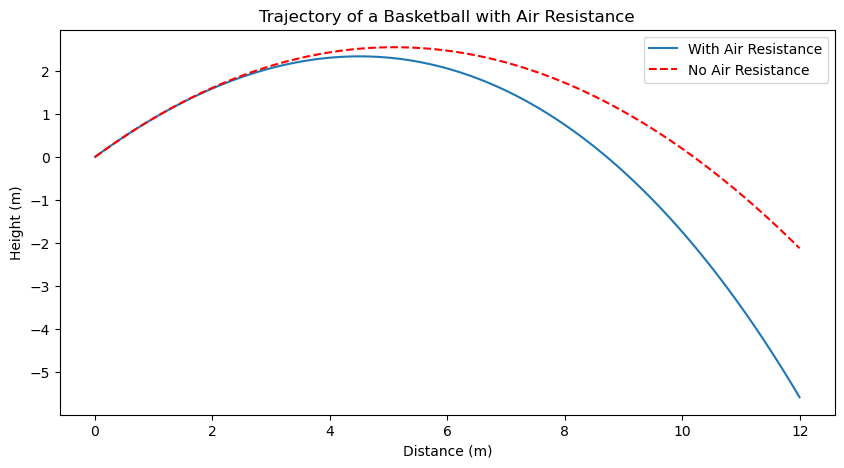

In [5]:
# Time vector
t = np.linspace(0, T, 100)  # time from 0 to T

# Define the system of ODEs
def deriv(w, t):
    vx, vy, x, y_pos = w
    v = np.sqrt(vx**2 + vy**2)
    dvxdt = -k * v * vx
    dvydt = -g - k * v * vy
    dxdt = vx
    dydt = vy
    return [dvxdt, dvydt, dxdt, dydt]

# Initial state vector
w_init = [vx0, vy0, 0, y0]

# Integrate the ODEs
sol = odeint(deriv, w_init, t)
vx, vy, x, y_pos = sol.T

# Plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x, y_pos, label='With Air Resistance')
plt.plot(x, x * np.tan(theta_rad) - (g / (2 * v0**2 * np.cos(theta_rad)**2)) * x**2, 'r--', label='No Air Resistance')
plt.title('Trajectory of a Basketball with Air Resistance')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
#plt.ylim(0, None)
#plt.grid()
plt.legend()
plt.show()

Vi sammenlikner også banen med den "naive" parabelbanen og ser at forskjellen er ganske stor.
I tillegg lager vi en animasjon. Den kan du sjekke ut i filen `basketball_trajectory.mp4` om du kjører koden lokalt.
Prøv også med dine egne parametre!

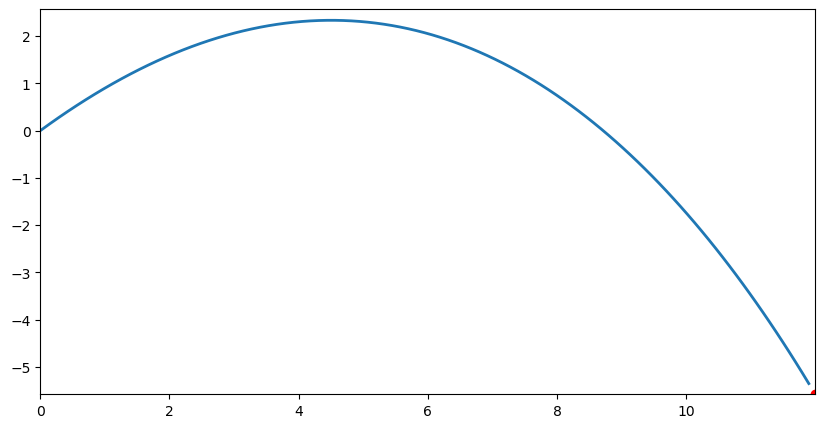

In [6]:
# Make an animation of the trajectory
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, np.max(x))
ax.set_ylim(np.min(y_pos), np.max(y_pos) * 1.1)
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], 'ro')
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point,
def update(frame):
    line.set_data(x[:frame], y_pos[:frame])
    point.set_data(x[frame], y_pos[frame])
    return line, point,
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=10)
# and save the animation as an mp4 file
ani.save('basketball_trajectory.mp4', writer='ffmpeg', fps=30)